<a href="https://colab.research.google.com/github/Samuel-Egbert31415/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/LS_DS_122_Chi2_Tests_Assignment_AG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Autograded Notebook (Canvas & CodeGrade)

This notebook will be automatically graded. It is designed to test your answers and award points for the correct answers. Following the instructions for each Task carefully.

### Instructions

* **Download this notebook** as you would any other ipynb file
* **Upload** to Google Colab or work locally (if you have that set-up)
* **Delete `raise NotImplementedError()`**
* Write your code in the `# YOUR CODE HERE` space
* **Execute** the Test cells that contain `assert` statements - these help you check your work (others contain hidden tests that will be checked when you submit through Canvas)
* **Save** your notebook when you are finished
* **Download** as a `ipynb` file (if working in Colab)
* **Upload** your complete notebook to Canvas (there will be additional instructions in Slack and/or Canvas)

# Lambda School Data Science - Unit 1 Sprint 2 Module 2

## Hypothesis Testing - Chi square tests

### Objectives

* Objective 01 - explain the purpose of a chi-square test and identify applications
* Objective 02 - set up a chi-square test for independence on two categorical variables
* Objective 03 - use a chi-square test p-value to draw the correct conclusion about the null and alternative hypothesis
* Objective 04 - explain how to compare the null hypothesis and sample and how randomness in the sampling process affect the result

### Introduction

Slasher movies thrill audiences by portraying a lone antagonist (typically male) who attacks innocent victims with extreme violence and without apparent motive. However, this exciting (if gory) subgenre of horror film is criticized by those who view the violence as being used to “punish” female characters who engage in sexual activity during the film. 

### Dataset description:

To test this claim, study authors randomly sampled 50 North American slasher films released from 1960 to 2009 and coded the 485 characters appearing in them as being male or female, involved in sexual activity or not, and if they survived the film or not. 

The data appears in the `Slasher.csv` dataset. In this project, we are going to answer a slightly simpler question: Are female characters in slasher films more likely to be "murdered" than male characters?

You can find the `Slasher.csv` file and more information [here](https://github.com/LambdaSchool/data-science-practice-datasets/tree/main/unit_1/Slasher)

*Source: A. Welsh (2010). "On the Perils of Living Dangerously in the Slasher Horror Film: Gender Differences in the Association Between Sexual Activity and Survival," Sex Roles, Vol. 62 pp. 762-773*

**Task 1** - Load the data

Let's load the data! The URL has been provided as well as the imports for pandas and numpy.

* load your CSV file into a DataFrame named `df_slasher`

In [3]:
# Task 1

# Imports 
import pandas as pd
import numpy as np

data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/9bf3c1c8882584a3010b88651a1d153e04ff7816/unit_1/Slasher/Slasher.csv'

df_slasher = pd.read_csv(data_url)

# Print out your DataFrame
df_slasher.head()

,ID,Gender,Activity,Survival
0,1,1,1,1
1,2,1,1,1
2,3,1,1,1
3,4,1,1,1
4,5,1,1,1


**Task 1 Test**

In [4]:
# Task 1 - Test

assert isinstance(df_slasher, pd.DataFrame), 'Have you created a DataFrame named `df_slasher`?'
assert len(df_slasher) == 485


**Task 2**- Character percentages

In this dataset, the variable codes are:

* ID = Character ID
* Gender = Character gender.  0 = male, 1 = female
* Activity = Character was portrayed as engaged in sexual activity.  0 = no, 1 = yes
* Survival = Character survival in the film. 0 = did not survive, 1 = survived

Your task is to calculate the frequency and relative frequency of male and female characters in this set of slasher films.

* Compute the cross tabulation for "Gender" for this dataset; call your table `gender_crosstab`
* Compute the relative frequency of female characters and call this value `f_percent`
* Compute the relative frequency of male characters and call this value `m_percent`

In [26]:
# Task 2

gender_crosstab = pd.crosstab(index = df_slasher['Gender'], columns= 'count')
print(gender_crosstab)
gender_crosstab_freq = pd.crosstab(index = df_slasher['Gender'], columns= 'count', normalize='columns')
print(gender_crosstab_freq)
f_percent = gender_crosstab_freq.loc[0]
print(f_percent)
m_percent = gender_crosstab_freq.loc[1]
print(m_percent)

col_0   count
Gender       
0         263
1         222
col_0      count
Gender          
0       0.542268
1       0.457732
col_0
count    0.542268
Name: 0, dtype: float64
col_0
count    0.457732
Name: 1, dtype: float64


**Task 2 Test**

In [28]:
# Task 2 - Test

assert isinstance(gender_crosstab, pd.DataFrame), 'Have you created the crosstab DataFrame?'


**Task 3** - Character survival

Calculate the frequency and relative frequency of character survival in this set of slasher films.

* Compute the cross tabulation for "Survival" for this dataset; call your table `survival_crosstab`
* Compute the frequency of character survival and call this value `survival`. Make sure to multiply by 100 so your value is a percent.

In [41]:
# Task 3

survival_crosstab = pd.crosstab(df_slasher['Gender'],columns = df_slasher['Survival'], normalize = 'index', margins=True)*100
print(survival_crosstab)

survival = survival_crosstab.iloc[2,1]

print(survival)



# Print the percentage of characters that survive
# print('Percentage of characters that survive:', survival)

Survival          0          1
Gender                        
0         86.692015  13.307985
1         77.477477  22.522523
All       82.474227  17.525773
17.525773195876287


**Task 3 Test**

In [42]:
# Task 3 - Test

assert isinstance(survival_crosstab, pd.DataFrame), 'Have you created the crosstab DataFrame?'


**Task 4**- Joint distribution: character survival and character sex

Next, we're going to calculate the joint distribution of *character sex ("Gender")* and movie *survival*. 

* Compute the joint distribution for character sex and survival and name your DataFrame `survival_fm_crosstab`

*Hint: If you are working from the in-class examples, it will be helpful to include character sex as the index variable. But play around with the arguments of `pd.crosstab()` to get a better idea of your table.*

In [43]:
# Task 4

survival_fm_crosstab = pd.crosstab(index=df_slasher['Gender'], columns = df_slasher['Survival'])

# Print the table
print(survival_fm_crosstab)

Survival    0   1
Gender           
0         228  35
1         172  50


**Task 4 Test**

In [44]:
# Task 4 - Test

assert isinstance(survival_fm_crosstab, pd.DataFrame), 'Have you created the crosstab DataFrame?'


**Task 5** - Joint distribution with margins

Now we're going to find the joint distribution but this time add in the **table margins**.

* Compute the joint distribution and assign this to a variable called `survival_fm_margins`.

In [46]:
# Task 5

survival_fm_margins = pd.crosstab(index=df_slasher['Gender'], columns = df_slasher['Survival'], margins = True)

# Print the table
print(survival_fm_margins)

Survival    0   1  All
Gender                
0         228  35  263
1         172  50  222
All       400  85  485


**Task 6** - Joint distribution with normalization

Okay, now let's look at the distribution using the `normalize` argument. We want to compare the *relative* rate of survival. Calculate the distribution of survival conditional on character sex.

* Compute the joint distribution for character sex and survival and name your DataFrame `survival_fm_crosstab_norm` **and** normalize on the "index"
* Multiply the resulting DataFrame by 100 to return answers as percents
* Assign the *survival* percentage of female characters to the variable `survival_f`

In [48]:
# Task 6

survival_fm_crosstab_norm = pd.crosstab(index=df_slasher['Gender'], columns = df_slasher['Survival'],normalize = 'index', margins = True)*100
survival_f = survival_fm_crosstab_norm.iloc[0,1]
# Print the percentage of female characters that survive
print(survival_fm_crosstab_norm)
print('Female character survival:', survival_f)

Survival          0          1
Gender                        
0         86.692015  13.307985
1         77.477477  22.522523
All       82.474227  17.525773
Female character survival: 13.307984790874524


**Task 6 Test**

In [50]:
# Task 6 - Test

assert isinstance(survival_fm_crosstab_norm, pd.DataFrame), 'Have you created the crosstab DataFrame?'


**Task 7** - State your hypotheses

Identify the appropriate null and alternative hypotheses to test for a statistically significant relationship between character sex and survival. 

This task will not be autograded - but it is part of completing the project.

**Task 7** - ANSWER

**Ho:** There is no relationship between variables 'Gender' and 'Survival' in slasher films

**Ha:** There is a relationship between variables 'Gender' and 'Survival' in slasher films

**Task 8** - Chi-square test

Perform the chi-square test above using `stats.chi2_contingency()`. The docs for this function are found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html).

* Compute the chi-square test and assign the p-value to the variable `p_val`
* Assign the other variables returned by the function to any variable names you prefer


In [57]:
# Task 8

# Import the scipy.stats function
from scipy.stats import chi2_contingency

g, p, dof, expctd = chi2_contingency(pd.crosstab(index=df_slasher['Gender'], columns = df_slasher['Survival']))

print("g = Chi-square statistic = ", g)
print("p = p_val =" ,p )
p_val = p
print("dof = Degrees of Freedom =" ,dof )
print("expctd = Expected values =" ,expctd )
# Print out the p-value
print('The p-value is:', p_val)

g = Chi-square statistic =  6.448486105276048
p = p_val = 0.011104692591139975
dof = Degrees of Freedom = 1
expctd = Expected values = [[216.90721649  46.09278351]
 [183.09278351  38.90721649]]
The p-value is: 0.011104692591139975


**Task 8 Test**

In [58]:
# Task 8 Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 9** - Interpret your results

Interpret your p-value from Task 8 using an `alpha = 0.05` significance level, and summarize your results in a sentence or two.

This task will not be autograded - but it is part of completing the project.

**Task 9** - ANSWER

given a significance of $alpha$ = 0.05, we must reject the null hypothesis and conclude there is a non-random relationship between survival rate and gender in slasher films

**Task 10** - Create a bar plot

Create a side-by-side bar plot to illustrate the relationship between character sex and survival in slasher movies.  Sum up your overall results in a sentence or two.

This task will not be autograded - but it is part of completing the project.

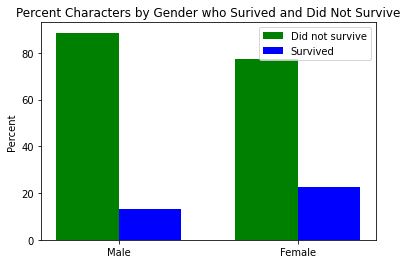

In [65]:
# Task 10

import matplotlib.pyplot as plt

# Need this for graphing purposes - it's the number of passenger classes
N = 2

Died = (88.6,77.4) # Percent that died in each ticket class
Survived = (13.2,22.5) #Percent that survived in each ticket class

#This is more graphical stuff
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

#Create the plot
fig, ax = plt.subplots()
rects1 = ax.bar(ind, Died, width, color='g') #bars for died
rects2 = ax.bar(ind + width, Survived, width, color='b') #bars for survived

# add some text for labels, title and axes ticks
ax.set_ylabel('Percent')
ax.set_title('Percent Characters by Gender who Surived and Did Not Survive')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Male','Female'))

ax.legend((rects1[0], rects2[0]), ('Did not survive', 'Survived'))

**Task 10** - ANSWER
A greater percent of males died than females, and at a significance level of  p = 0.05, we indeed find that there is a non-random relationship between gender and survival in slasher films